In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
df = pd.read_csv('C:\\Users\\mokra\\Desktop\\python projects\\sleep-health-analysis\\expanded_sleep_health_dataset.csv')
#inspection
df.head(5)
df.dtypes
df.info()
df.describe()
df.isnull().sum()
df.duplicated().sum()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                1500 non-null   int64  
 1   Gender                   1500 non-null   object 
 2   Age                      1500 non-null   int64  
 3   Occupation               1500 non-null   object 
 4   Sleep Duration           1500 non-null   float64
 5   Quality of Sleep         1500 non-null   int64  
 6   Physical Activity Level  1500 non-null   int64  
 7   Stress Level             1500 non-null   int64  
 8   BMI Category             1500 non-null   object 
 9   Blood Pressure           1500 non-null   object 
 10  Heart Rate               1500 non-null   int64  
 11  Daily Steps              1500 non-null   int64  
 12  Sleep Disorder           539 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 152.5+ KB


np.int64(0)

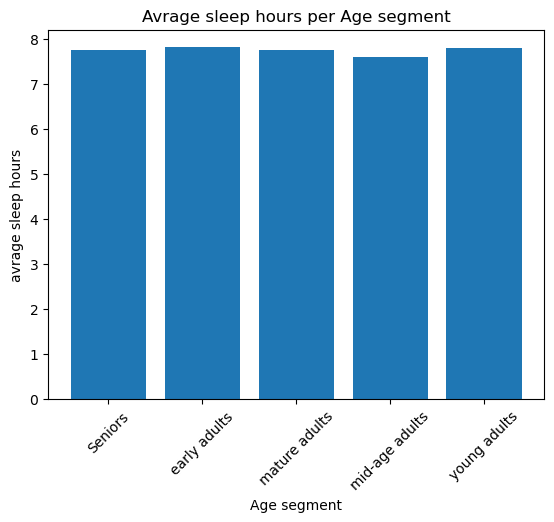

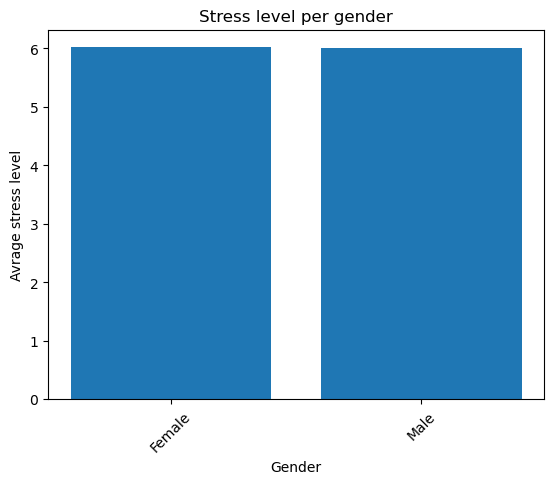

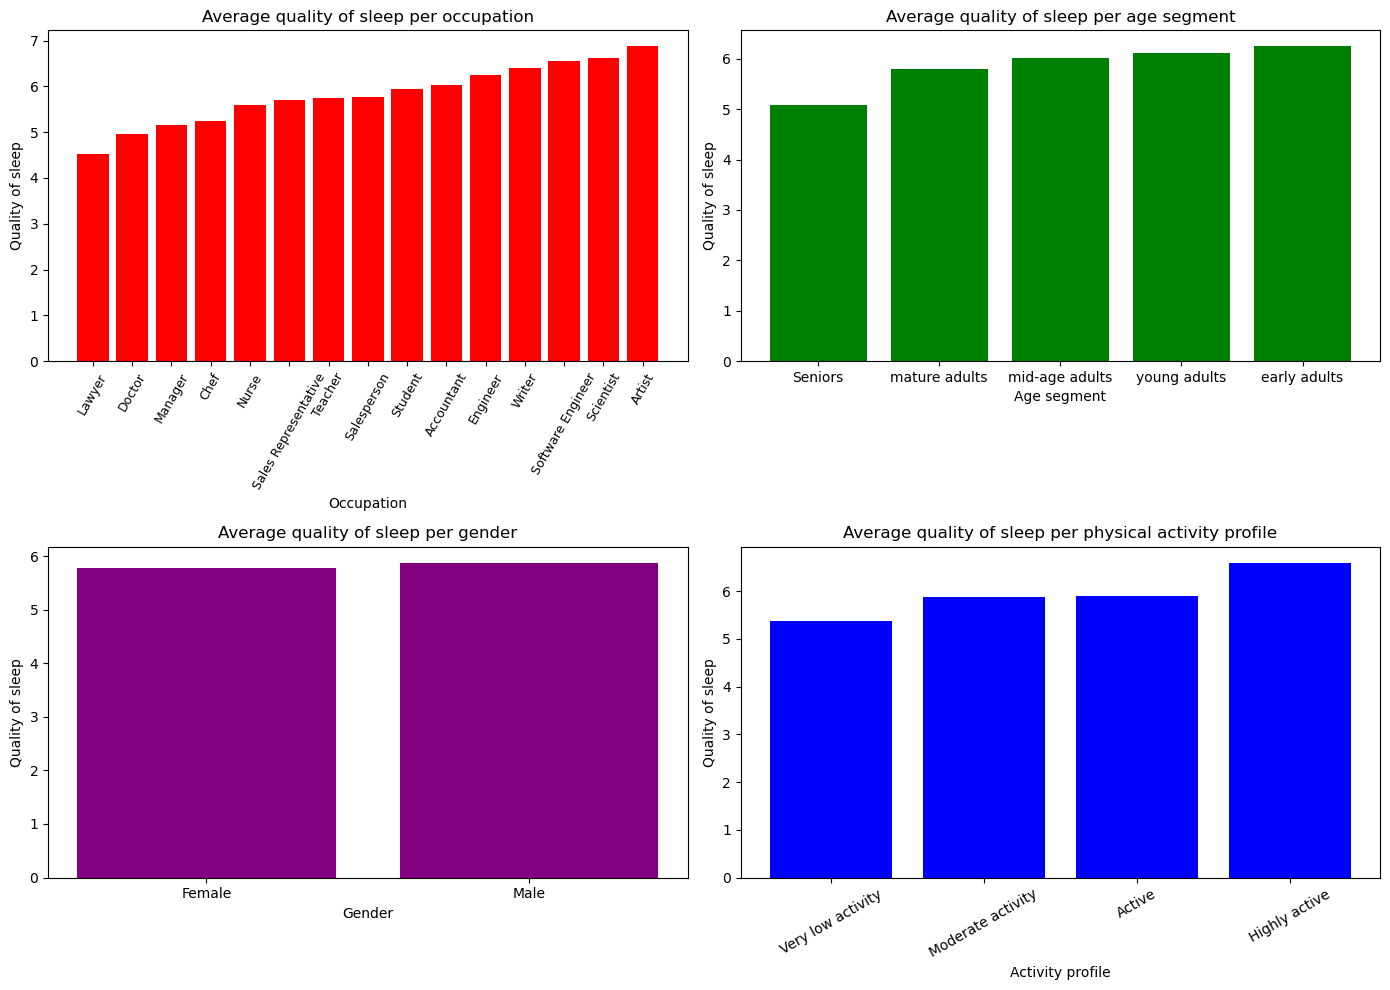

In [ ]:
#Distribution du sommeil : Quelle est la durée moyenne de sommeil par tranche d’âge ?
age_max = df.Age.max()
age_min =df.Age.min()

condition = [
    ((df.Age >=18) & (df.Age <35)),
    ((df.Age >=35) & (df.Age <45)),
    ((df.Age >=45) & (df.Age <55)),
    ((df.Age >=55) & (df.Age <65)),
]

selection = [
    'young adults',
    'early adults',
    'mid-age adults',
    'mature adults',
]

df['Age_segments'] = np.select(condition, selection, default='Seniors')

avg_sleep_per_age_segment = df.groupby(['Age_segments'])['Sleep Duration'].mean()
avg_sleep_per_age_segment

plt.bar(avg_sleep_per_age_segment.index, avg_sleep_per_age_segment.values)
plt.title('Avrage sleep hours per Age segment')
plt.xlabel('Age segment')
plt.ylabel('avrage sleep hours')
plt.xticks(rotation=45)
plt.show()


#Genre et stress : Y a-t-il une différence de niveau de stress entre les genres ?
stress_lvl_max = df['Stress Level'].max()
stress_lvl_min =df['Stress Level'].min()
df.Gender.unique()
stress_per_gender = df.groupby(['Gender'])['Stress Level'].mean()


plt.bar(stress_per_gender.index, stress_per_gender.values)
plt.title('Stress level per gender')
plt.xlabel('Gender')
plt.ylabel('Avrage stress level')
plt.xticks(rotation=45)
plt.show()


#Les personnes ayant un niveau d’activité physique élevé présentent-elles un niveau de stress plus faible ?

condition_sp = [
    (df['Physical Activity Level'] < 30),
    ((df['Physical Activity Level'] >= 30) & (df['Physical Activity Level'] < 59)),
    ((df['Physical Activity Level'] >= 60) & (df['Physical Activity Level'] < 119)),
]

selection_sp = [
    'Very low activity',
    'Moderate activity',
    'Active',
]

df['Physical Activity Profil'] = np.select(condition_sp, selection_sp, default='Highly active')

stress_sport_cor = df.groupby(['Physical Activity Profil'])['Stress Level'].mean()

#Profession et stress : Certaines professions sont-elles associées à un niveau de stress plus élevé ?
occup_stress = df.groupby(['Occupation'])['Stress Level'].mean().reset_index()


#Quels facteurs semblent associés à la qualité de sommeil ?

sd_occup = df.groupby(['Occupation'])['Quality of Sleep'].mean().sort_values()
sd_Age_segment = df.groupby(['Age_segments'])['Quality of Sleep'].mean().sort_values()
sd_Gender = df.groupby(['Gender'])['Quality of Sleep'].mean().sort_values()
sd_activity_profil = df.groupby(['Physical Activity Profil'])['Quality of Sleep'].mean().sort_values()





import numpy as np
import matplotlib.pyplot as plt

# Préparation des données
x_occup = np.arange(len(sd_occup))
x_age = np.arange(len(sd_Age_segment))
x_gender = np.arange(len(sd_Gender))
x_activity = np.arange(len(sd_activity_profil))

fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# 1. Occupation
# 1. Occupation
axs[0, 0].bar(x_occup, sd_occup.values, color='red')
axs[0, 0].set_xticks(x_occup)
axs[0, 0].set_xticklabels(sd_occup.index, rotation=60, ha='center')
axs[0, 0].tick_params(axis='x', labelsize=9)
axs[0, 0].set_title('Average quality of sleep per occupation')
axs[0, 0].set_xlabel('Occupation')
axs[0, 0].set_ylabel('Quality of sleep')


# 2. Age segment
axs[0, 1].bar(x_age, sd_Age_segment.values, color='green')
axs[0, 1].set_xticks(x_age)
axs[0, 1].set_xticklabels(sd_Age_segment.index, rotation=0, ha='center')
axs[0, 1].set_title('Average quality of sleep per age segment')
axs[0, 1].set_xlabel('Age segment')
axs[0, 1].set_ylabel('Quality of sleep')

# 3. Gender
axs[1, 0].bar(x_gender, sd_Gender.values, color='purple')
axs[1, 0].set_xticks(x_gender)
axs[1, 0].set_xticklabels(sd_Gender.index, rotation=0, ha='center')
axs[1, 0].set_title('Average quality of sleep per gender')
axs[1, 0].set_xlabel('Gender')
axs[1, 0].set_ylabel('Quality of sleep')

# 4. Physical activity profile
axs[1, 1].bar(x_activity, sd_activity_profil.values, color='blue')
axs[1, 1].set_xticks(x_activity)
axs[1, 1].set_xticklabels(sd_activity_profil.index, rotation=30, ha='center')
axs[1, 1].set_title('Average quality of sleep per physical activity profile')
axs[1, 1].set_xlabel('Activity profile')
axs[1, 1].set_ylabel('Quality of sleep')

plt.tight_layout()
plt.show()


